In [1]:
from matplotlib import pyplot as plt
import numpy as np
#from scipy.signal import convolve2d
from scipy import ndimage
from PIL import Image
from ipywidgets import interact
from pathlib import Path
import sys
from importlib import reload

# Start laboratory

>- check / set working directory
>- add a temporary module search path to sys.path
>- set the image address
>- importing your own 'mymodule' module with functions 

In [2]:
%pwd

'/home/u1/22_dydaktyka/05imProc/rok2021'

In [3]:
sys.path

['/home/u1/22_dydaktyka/05imProc/rok2021',
 '/home/u1/anaconda3/envs/lab2/lib/python39.zip',
 '/home/u1/anaconda3/envs/lab2/lib/python3.9',
 '/home/u1/anaconda3/envs/lab2/lib/python3.9/lib-dynload',
 '',
 '/home/u1/anaconda3/envs/lab2/lib/python3.9/site-packages',
 '/home/u1/anaconda3/envs/lab2/lib/python3.9/site-packages/IPython/extensions',
 '/home/u1/.ipython']

In [4]:
tmp = Path('module/').resolve()
sys.path.append(tmp.as_posix())
sys.path

['/home/u1/22_dydaktyka/05imProc/rok2021',
 '/home/u1/anaconda3/envs/lab2/lib/python39.zip',
 '/home/u1/anaconda3/envs/lab2/lib/python3.9',
 '/home/u1/anaconda3/envs/lab2/lib/python3.9/lib-dynload',
 '',
 '/home/u1/anaconda3/envs/lab2/lib/python3.9/site-packages',
 '/home/u1/anaconda3/envs/lab2/lib/python3.9/site-packages/IPython/extensions',
 '/home/u1/.ipython',
 '/home/u1/22_dydaktyka/05imProc/rok2021/module']

## Import 'mymod' 

In [5]:
import mymod

In [6]:
reload(mymod)

<module 'mymod' from '/home/u1/22_dydaktyka/05imProc/rok2021/module/mymod.py'>

## Open image

In [7]:
%ls

april14-1.ipynb  april28.ipynb    imgs/       may052021.ipynb  yyy.ipynb
april14.ipynb    cannyTest.ipynb  lab1.ipynb  may12.ipynb
april21.ipynb    im1.jpg          lab2.ipynb  module/


In [8]:
%ls imgs/

cameraman.tif       lena_gray_512.tif  sent.jpg
lena_color_512.tif  peppers_color.jpg


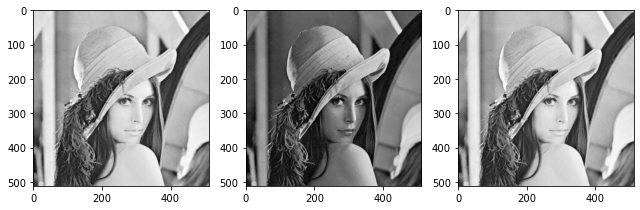

In [9]:
ad = 'imgs/lena_color_512.tif'
im = Image.open(ad)
ar = np.asarray(im)
mymod.myshow([ar[...,0],ar[...,1],ar[...,0]],1,3,3)

# RGB to gray

Popular methods to convert `rgb` image to` gray`:
 >- averaging
 >- weighted sum 

```python
def myRgb2gray(ar,mode=2):
    maxval = ar.max()
    ar = floatInt(ar.copy())
    
    
    if mode ==1:
        ar = ar.mean(axis=-1)
        
    elif mode ==2:
        ar = ar * np.array([0.2126,0.7152,0.0722])
        ar = ar.sum(axis=-1)
    
    ar = floatInt(ar,outMax=maxval)
    
    return ar
```

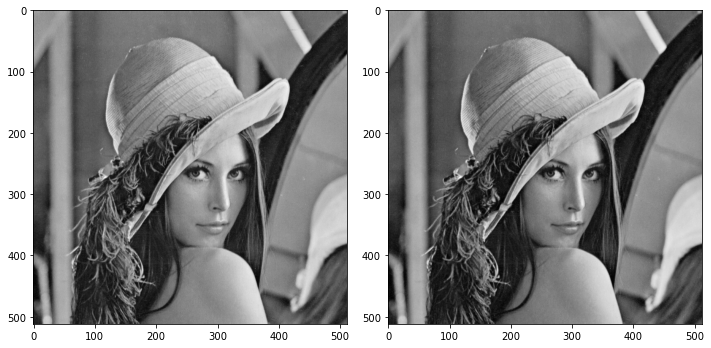

In [10]:
ar1 = mymod.myRgb2gray(ar,1)
ar2 = mymod.myRgb2gray(ar,2)
mymod.myshow([ar1,ar2],1,2,(10,5))

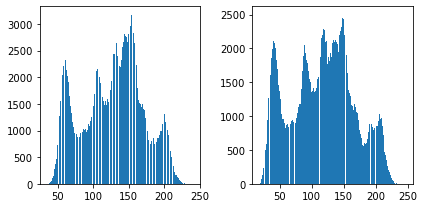

In [11]:
mymod.myshow([ar1,ar2],1,2,(6,3),hist=1)

# Prewit kernel

Edge detection using the prewitt kernel:
>- kx, ky - create kernels
>- `gx,gy` - `convolution`: calculation of gradients along the `ox` and `oy` axes
>- calculation of the summary gradient: $grad = \sqrt{gx^2 + gy^2}$


## Kernels kx, ky

In [12]:
ky = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kx = ky.T
print(kx,ky,sep='\n\n')

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]

[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


## Gradients
>- gx, gy
>- grad

In [13]:
gx = mymod.myConv2d(ar2,kx)
gy = mymod.myConv2d(ar2,ky)
grad = np.hypot(gx,gy)

# for visualization
wx = mymod.myScale(gx,255)
wy = mymod.myScale(gy,255)
w = mymod.myScale(grad,255)

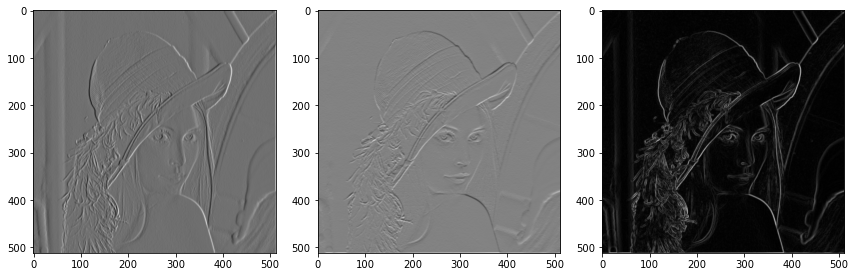

In [14]:
mymod.myshow([wx,wy,w],1,3,4)

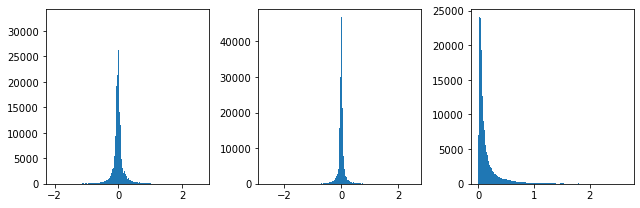

In [15]:
mymod.myshow([gx,gy,grad],1,3,3,1)

# Noise removing

## gauss 2d

$$f(x,y,\sigma) = \frac{1}{\sigma\cdot2\pi} \exp\left(
-\frac{x^2+y^2}{2\sigma^2}\right)$$

>Write functions that generate numbers from the Gauss distribution and store them in the `mymod` module. 

```python
def myGaus2D(x,y,sigma=1):
    ''' x,y :  number or array of number
    '''
    ex = (x**2 + y**2)/(2*sigma**2)
    fg= 1 / (sigma**2 * np.pi * 2) * np.exp(-ex)
    return fg
```

In [16]:
mymod.myGaus2D(-1,-2)

0.013064233284684921

```python
def gausKern(size,sigma=1,n=3):
    # size: (2k + 1)x(2k+1)
    k = int((size - 1)/2)
    r = range(-k,k+1) # range
    y,x = np.meshgrid(r,r)
    return np.round(myGaus2D(x,y,sigma),n)
```

In [17]:
mymod.gausKern(3,1.4)

array([[0.049, 0.063, 0.049],
       [0.063, 0.081, 0.063],
       [0.049, 0.063, 0.049]])

## Kernel Gauss
- three kernel sizes: 3x3, 5x5, 11x11

In [18]:
kernels = []
for size in [3,5,11]:
    tmp = mymod.gausKern(size=size,sigma=2)
    print(f'size: {size}, kernel:\n{tmp}\n')
    kernels.append(tmp)

size: 3, kernel:
[[0.031 0.035 0.031]
 [0.035 0.04  0.035]
 [0.031 0.035 0.031]]

size: 5, kernel:
[[0.015 0.021 0.024 0.021 0.015]
 [0.021 0.031 0.035 0.031 0.021]
 [0.024 0.035 0.04  0.035 0.024]
 [0.021 0.031 0.035 0.031 0.021]
 [0.015 0.021 0.024 0.021 0.015]]

size: 11, kernel:
[[0.    0.    0.001 0.001 0.002 0.002 0.002 0.001 0.001 0.    0.   ]
 [0.    0.001 0.002 0.003 0.005 0.005 0.005 0.003 0.002 0.001 0.   ]
 [0.001 0.002 0.004 0.008 0.011 0.013 0.011 0.008 0.004 0.002 0.001]
 [0.001 0.003 0.008 0.015 0.021 0.024 0.021 0.015 0.008 0.003 0.001]
 [0.002 0.005 0.011 0.021 0.031 0.035 0.031 0.021 0.011 0.005 0.002]
 [0.002 0.005 0.013 0.024 0.035 0.04  0.035 0.024 0.013 0.005 0.002]
 [0.002 0.005 0.011 0.021 0.031 0.035 0.031 0.021 0.011 0.005 0.002]
 [0.001 0.003 0.008 0.015 0.021 0.024 0.021 0.015 0.008 0.003 0.001]
 [0.001 0.002 0.004 0.008 0.011 0.013 0.011 0.008 0.004 0.002 0.001]
 [0.    0.001 0.002 0.003 0.005 0.005 0.005 0.003 0.002 0.001 0.   ]
 [0.    0.    0.001 0.001 

## Convolution 1
- using your own function `xxx ()`

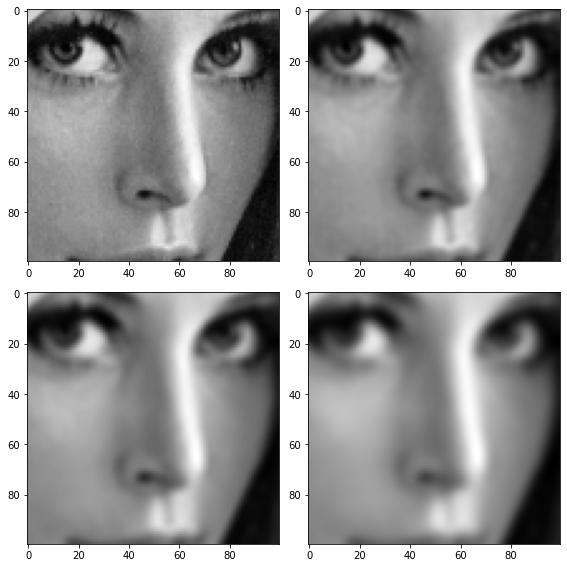

In [19]:
res = []
for k in kernels:
    tmp = mymod.myConv2d(ar2,k)
    res.append(tmp)


scrap = [x[250:350,250:350].copy() for x in res]
mymod.myshow([ar2[250:350,250:350],*scrap],2,2,(8,8))

## Convolution 2
>- using your own `convolve()` function from the `scipy.ndimage` module 

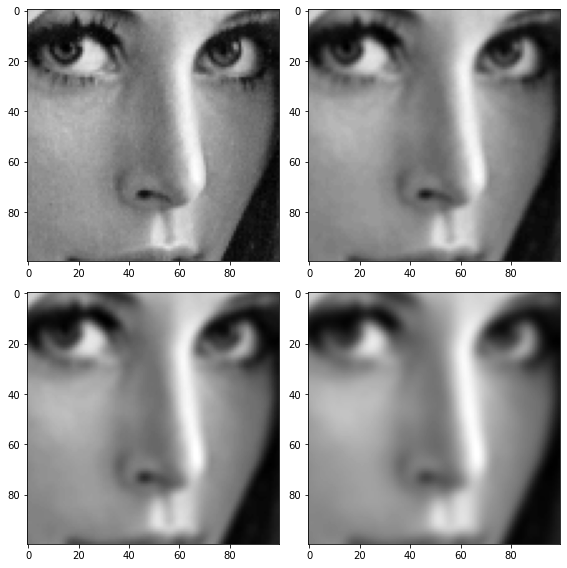

In [20]:
res = []
for k in kernels:
    tmp = ndimage.convolve(ar2,k)
    res.append(tmp)


scrap = [x[250:350,250:350].copy() for x in res]
mymod.myshow([ar2[250:350,250:350],*scrap],2,2,(8,8))

# Comparison of selected kernels 

In [21]:
kernels = [np.ones((x,x)) for x in (3,5,7)]
kernels

[array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 array([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]])]

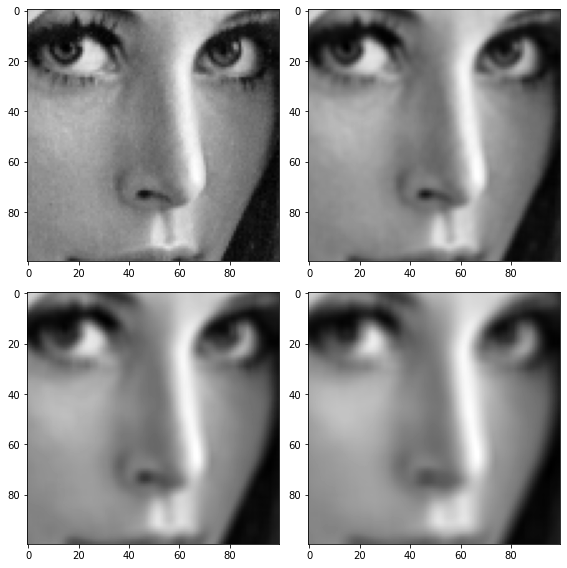

In [22]:
res1 = []
for k in kernels:
    #tmp = mymod.myConv2d(ar2,k)#,outMax=255)
    tmp = ndimage.convolve(ar2/ar2.max(),k)
    res1.append(tmp)

# mean kernels vs gaus
scrap1 = [x[250:350,250:350].copy() for x in res1]
mymod.myshow([ar2[250:350,250:350],*scrap1],2,2,(8,8))

In [23]:
ar2.dtype

dtype('uint8')

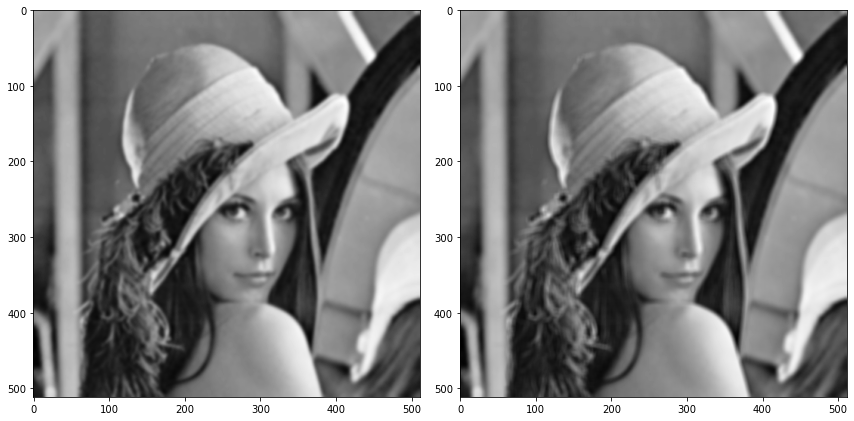

In [24]:
mymod.myshow([res[-1],res1[-1]],1,2,6)

In [25]:
# high pass kernels 
kernels = [-np.ones((3,3)) for i in range(2)]
kernels[0][1,1]=9
kernels[1][1,1]=20
kernels[1][[0,0,2,2],[0,2,0,2]]=0
kernels

[array([[-1., -1., -1.],
        [-1.,  9., -1.],
        [-1., -1., -1.]]),
 array([[ 0., -1.,  0.],
        [-1., 20., -1.],
        [ 0., -1.,  0.]])]

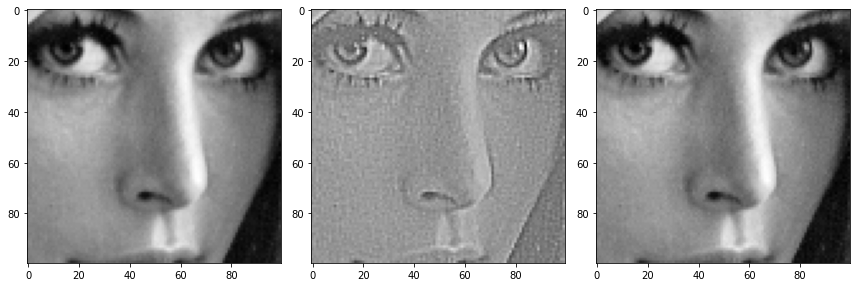

In [26]:
res = []
for k in kernels:
    #tmp = mymod.myConv2d(ar2,k)#,outMax=255)
    tmp = ndimage.convolve(ar2/ar2.max(),k)
    res.append(tmp)


scrap = [x[250:350,250:350].copy() for x in res]
mymod.myshow([ar2[250:350,250:350],*scrap],1,3,4)